In [105]:
import sys
from pathlib import Path
from data.input_data import DatasetCreator
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans

In [106]:
# Get the absolute path of the current file
current_file_path = Path('cluster_k_means.ipynb').resolve()

# Get the directory of the current file
project_dir = current_file_path.parent

# Add the project directory to sys.path
sys.path.insert(0, str(project_dir))


# Step 1: Create Datasets
dataset_creator = DatasetCreator()
blob_dataset = dataset_creator.create_blob_dataset()
points_dataset = dataset_creator.create_points_dataset()

In [107]:
X_blob, y_blob = blob_dataset['X'], blob_dataset['y']
X_points = points_dataset['X']

In [108]:
# Step 2: Create and Fit KMeans and MiniBatchKMeans models for make_blob dataset
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_blob)
kmeans_labels = kmeans.predict(X_blob)

minibatch_kmeans = MiniBatchKMeans(n_clusters=3, random_state=42, batch_size=100)
minibatch_kmeans.fit(X_blob)
minibatch_kmeans_labels = minibatch_kmeans.predict(X_blob)

In [109]:
# Step 3: Create and Fit KMeans and MiniBatchKMeans models on points dataset
kmeans_points = KMeans(n_clusters=3, random_state=42)
kmeans_points.fit(X_points)
kmeans_points_labels = kmeans_points.predict(X_points)

minibatch_kmeans_points = MiniBatchKMeans(n_clusters=3, random_state=42, batch_size=100)
minibatch_kmeans_points.fit(X_points)
minibatch_kmeans_points_labels = minibatch_kmeans_points.predict(X_points)

In [110]:
# Step 4: Plot the Clusters
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='.')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

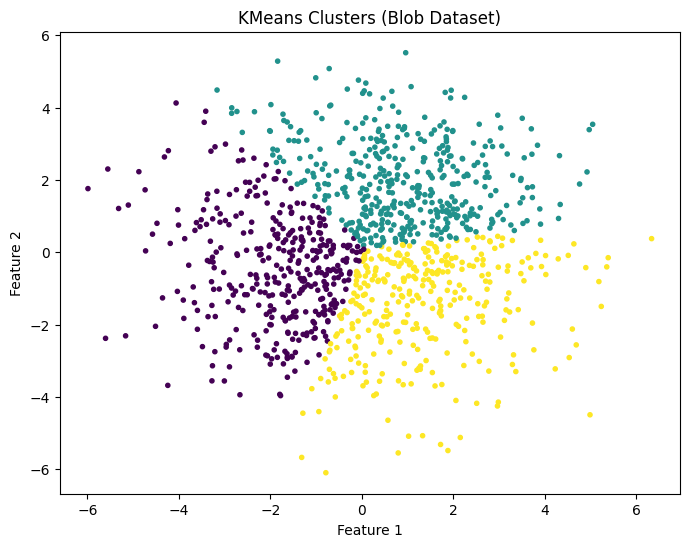

In [111]:
# Plot clusters for the blob dataset
plot_clusters(X_blob, kmeans_labels, 'KMeans Clusters (Blob Dataset)')

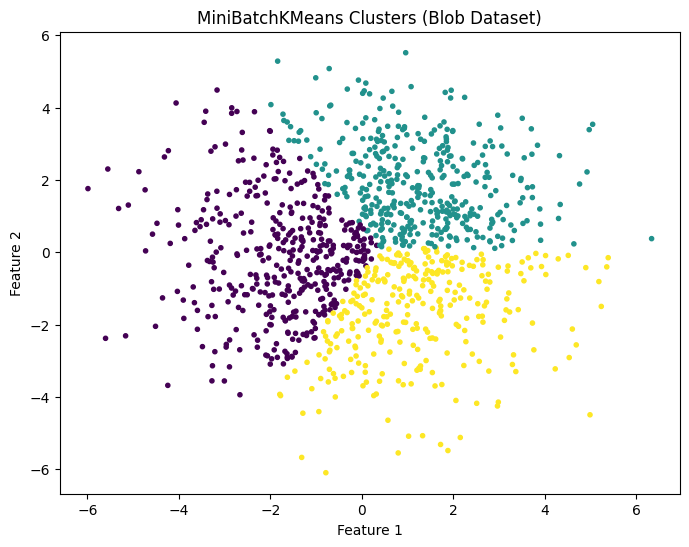

In [112]:
plot_clusters(X_blob, minibatch_kmeans_labels, 'MiniBatchKMeans Clusters (Blob Dataset)')

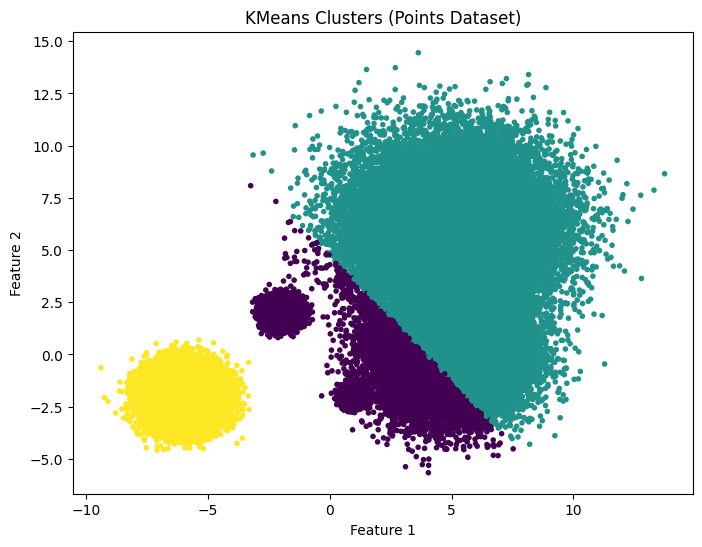

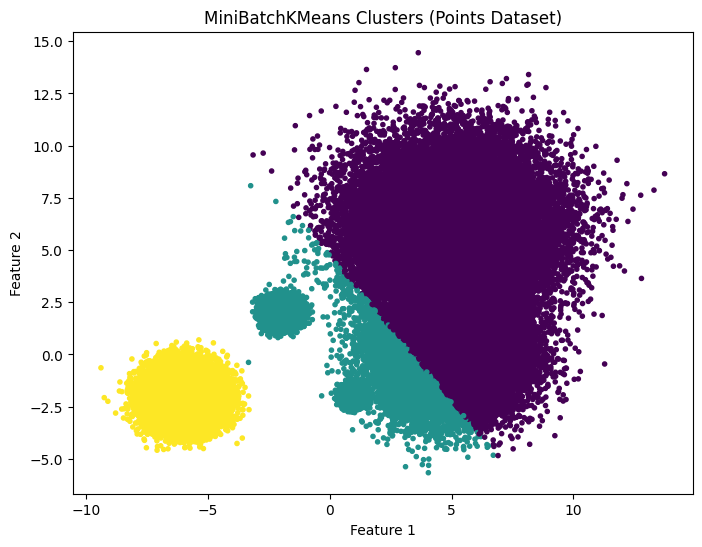

In [113]:
# Plot clusters for the points dataset
plot_clusters(X_points, kmeans_points_labels, 'KMeans Clusters (Points Dataset)')
plot_clusters(X_points, minibatch_kmeans_points_labels, 'MiniBatchKMeans Clusters (Points Dataset)')